In [20]:
import numpy as np
import pandas as pd

In [21]:
class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        S_W = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            S_W += (X_c - mean_c).T.dot((X_c - mean_c))

        mean_overall = np.mean(X, axis=0)
        S_B = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            S_B += n_c * (mean_diff).dot(mean_diff.T)

        A = np.linalg.inv(S_W).dot(S_B)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)

In [23]:
X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

In [24]:
lda = LDA(n_components=2)
lda.fit(X, y)
X_lda = lda.transform(X)

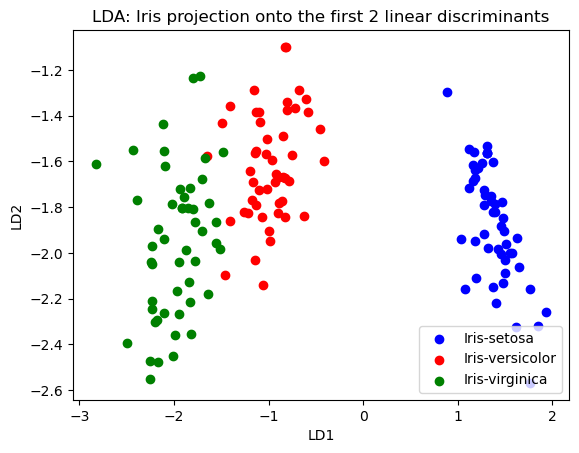

In [25]:
import matplotlib.pyplot as plt

for label,marker,color in zip(np.unique(y),('^', 's', 'o'),('blue', 'red', 'green')):
    plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                color=color,
                label=label
                )

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower right')
plt.title('LDA: Iris projection onto the first 2 linear discriminants')
plt.show()